In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt, floor, ceil
import math

# All the six methods of template matching using opencv

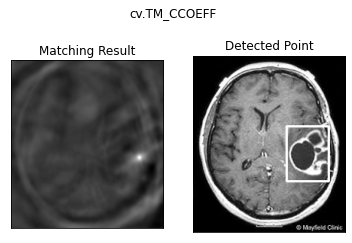

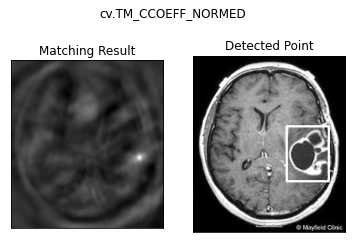

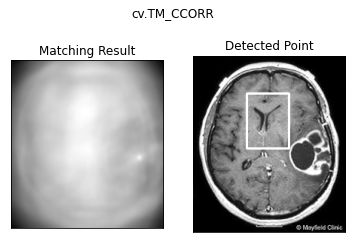

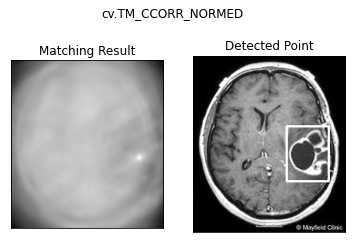

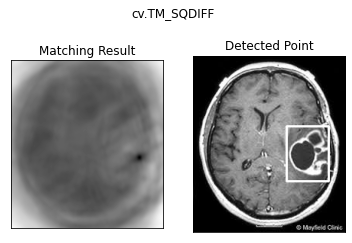

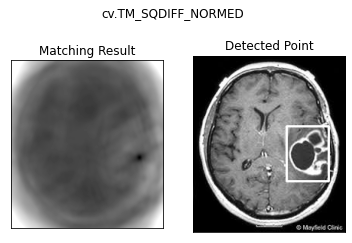

In [2]:
img = cv.imread('brain.jpg',0)

cv.imshow("Original Coke", img)
k= cv.waitKey(0)

img2 = img.copy()
template = cv.imread('target.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()


1. NOTE 1: Situations where you know the rotation, scale, and viewing angle are constant, template matching can work wonders.
2. NOTE 2: You can see that the result using cv.TM_CCORR is not good as we expected.

# Implement Template Matching by using Normalized Cross Correlation from scratch


In [3]:
# Normalised Cross Correlation
def Normalised_Cross_Correlation(roi, target):
    # Normalised Cross Correlation Equation
    cor = np.sum(roi * target)
    nor = np.sqrt( (np.sum(roi ** 2))) * np.sqrt(np.sum(target ** 2))

    return cor / nor

# Template matching 
def template_matching(img, target):
    # initial parameter
    width,height = img.shape[::-1]
    tar_width, tar_height = target.shape[::-1]
    (max_Y, max_X) = (0, 0)
    MaxValue = 0

    # Set image, target and result value matrix
    img = np.array(img, dtype="int")
    target = np.array(target, dtype="int")
    NccValue = np.zeros((height-tar_height, width-tar_width))

    # calculate value using filter-kind operation from top-left to bottom-right
    for y in range(0, height-tar_height):
        for x in range(0, width-tar_width):
            # image roi
            roi = img[y : y+tar_height, x : x+tar_width]
            # calculate ncc value
            NccValue[y, x] = Normalised_Cross_Correlation(roi, target) # function call 
            # find the most match area
            if NccValue[y, x] > MaxValue:
                MaxValue = NccValue[y, x]
                (max_Y, max_X) = (y, x)

    return (max_X, max_Y)


# Main
if __name__ == '__main__':
    
    image = cv.imread("brain.jpg", 0)
    target = cv.imread("target.jpg", 0)

    width, height = target.shape[::-1]

    # function call
    top_left = template_matching(image, target)
    
    # draw rectangle on the result region
    cv.rectangle(image, top_left, (top_left[0] + width, top_left[1] + height),(0, 255, 255), 2)

    cv.imshow("Result", image)
    k=cv.waitKey(0)